# Introduction

The files Peng gave me wouldn't make a cell browser page. I'm going to try to follow the scan py and cell browser docs starting with our C1 data to see if I can get a site working.

In [1]:
import scanpy
import cellbrowser
from cellbrowser.cellbrowser import cbScanpy
import os
import sys
import pandas
import numpy
from matplotlib import pyplot
import itertools
import anndata

In [2]:
%matplotlib inline

In [3]:
LRSC = os.path.expanduser('~/proj/long-rna-seq-condor/')
if LRSC not in sys.path:
    sys.path.append(LRSC)
    
from woldrnaseq.models import (
    load_library_tables,
    load_experiments,
    load_quantifications,
)
from woldrnaseq.madqc import (
    load_genomic_quantifications,
)
from woldrnaseq.gtfcache import load_gtf_cache

In [4]:
gtf = load_gtf_cache(os.path.expanduser('~/proj/genome/mm10-M4-male/mm10-M4-male.h5'))

In [5]:
gtf.columns

Index(['chromosome', 'source', 'type', 'start', 'stop', 'score', 'strand',
       'frame', 'gene_id', 'transcript_id', 'gene_type', 'gene_status',
       'gene_name', 'transcript_type', 'transcript_status', 'transcript_name',
       'level', 'havana_gene', 'tag', 'havana_transcript', 'exon_number',
       'exon_id', 'transcript_support_level', 'protein_id', 'ccdsid', 'ont'],
      dtype='object')

In [6]:
gtf.head()

,chromosome,source,type,start,stop,score,strand,frame,gene_id,transcript_id,...,level,havana_gene,tag,havana_transcript,exon_number,exon_id,transcript_support_level,protein_id,ccdsid,ont
0,chr1,HAVANA,gene,3073253,3074322,NaN,1,NaN,ENSMUSG00000102693.1,ENSMUSG00000102693.1,...,2.0,OTTMUSG00000049935.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chr1,HAVANA,transcript,3073253,3074322,NaN,1,NaN,ENSMUSG00000102693.1,ENSMUST00000193812.1,...,2.0,OTTMUSG00000049935.1,basic,OTTMUST00000127109.1,NaN,NaN,NaN,NaN,NaN,NaN
2,chr1,HAVANA,exon,3073253,3074322,NaN,1,NaN,ENSMUSG00000102693.1,ENSMUST00000193812.1,...,2.0,OTTMUSG00000049935.1,basic,OTTMUST00000127109.1,1.0,ENSMUSE00001343744.1,NaN,NaN,NaN,NaN
3,chr1,ENSEMBL,gene,3102016,3102125,NaN,1,NaN,ENSMUSG00000064842.1,ENSMUSG00000064842.1,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chr1,ENSEMBL,transcript,3102016,3102125,NaN,1,NaN,ENSMUSG00000064842.1,ENSMUST00000082908.1,...,3.0,NaN,basic,NaN,NaN,NaN,NA,NaN,NaN,NaN


In [7]:
id_to_name = {}
for i, row in gtf[['gene_id', 'gene_name']].iterrows():
    id_to_name[row.gene_id] = row.gene_name

In [8]:
library_file = 'paper_analysis_vdir/library_vdir.tsv'
experiment_file = 'paper_analysis_vdir/experiment_time.tsv'

libraries = load_library_tables([library_file])
experiments = load_experiments([experiment_file])

In [9]:
experiment_all = pandas.DataFrame({
    'experiment': ['all'],
    'replicates': [list(itertools.chain(*experiments['replicates']))],
}).set_index('experiment')
experiment_all

,replicates
experiment,
all,"[17327_A10, 17327_A11, 17327_A12, 17327_A2, 17..."


In [11]:
expression = load_genomic_quantifications(experiment_all.iloc[0], libraries, 'expected_count')

quantifications all (69690, 920)


In [12]:
y = [x for x in expression.index if x.startswith('E')]
len(y)

43346

In [13]:
y[0], y[-1]

('ENSMUSG00000000001.4', 'ENSMUSG00000104527.1')

In [14]:
genes = expression.loc['ENSMUSG00000000001.4':'ENSMUSG00000104527.1']
print(genes.shape)
genes

(43346, 920)


,17327_A10,17327_A11,17327_A12,17327_A2,17327_A3,17327_A4,17327_A5,17327_A7,17327_A8,17327_A9,...,20048_E6,20048_E9,20049_F1,20049_F2,20049_F3,20049_F4,20049_F5,20049_F6,20049_F7,20049_F8
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000000001.4,566.0,1829.00,1556.0,1449.0,1054.00,759.00,645.0,748.0,468.0,1188.0,...,133.0,229.00,1108.0,865.00,989.00,2100.0,906.00,184.00,1438.0,291.0
ENSMUSG00000000003.11,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0
ENSMUSG00000000028.10,185.0,323.00,199.0,188.0,824.00,439.00,177.0,328.0,612.0,646.0,...,109.0,0.00,0.0,91.00,104.00,0.0,410.00,0.00,0.0,0.0
ENSMUSG00000000031.11,583.0,1806.00,1586.0,432.0,589.00,756.00,2005.0,534.0,1039.0,1603.0,...,288.0,456.25,663.0,1675.48,375.63,222.8,283.28,1040.61,723.0,1202.8
ENSMUSG00000000037.12,115.0,0.00,0.0,0.0,316.00,0.00,0.0,0.0,0.0,0.0,...,0.0,84.00,0.0,183.00,14.00,0.0,28.00,9.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000104523.1,3.0,6.98,0.0,3.0,11.91,0.98,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.00,0.50,0.0,0.00,0.00,0.0,0.0
ENSMUSG00000104524.1,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,2.0,0.0,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0
ENSMUSG00000104525.1,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0


In [15]:
minimum_expressed_cells = genes.shape[1] * .05
minimum_expressed_cells

46.0

In [16]:
expressed_gene_filter = genes[genes>0].count(axis=1) >= minimum_expressed_cells
expressed_genes = genes[expressed_gene_filter]
print(expressed_genes.shape)
expressed_gene_ids = expressed_genes.index
expressed_genes.index = [x + "|" + id_to_name[x] for x in expressed_genes.index]

(17209, 920)


In [17]:
adata = anndata.AnnData(
    X=expressed_genes.T, 
    varm={'gene_id': expressed_gene_ids}
)

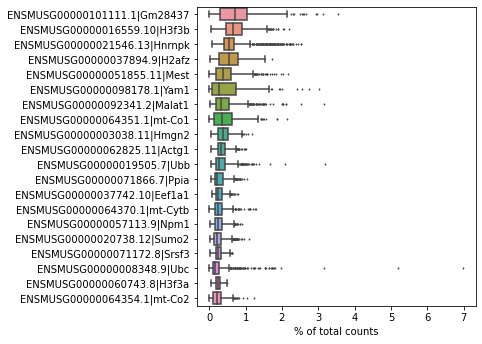

In [18]:
scanpy.pl.highest_expr_genes(adata, n_top=20, )

In [19]:
mito_genes = adata.var_names.str.contains('|mt-')
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
adata.obs['percent_mito'] = numpy.sum(
    adata[:, mito_genes].X, axis=1) / numpy.sum(adata.X, axis=1)
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1)
adata.obs['n_genes'] = numpy.sum(adata.X != 0, axis=1)


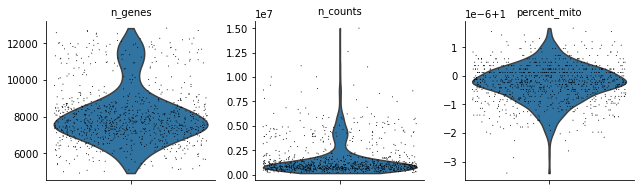

In [20]:
scanpy.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0.4, multi_panel=True)

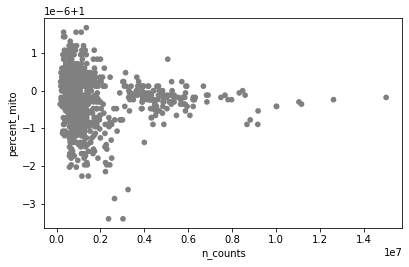

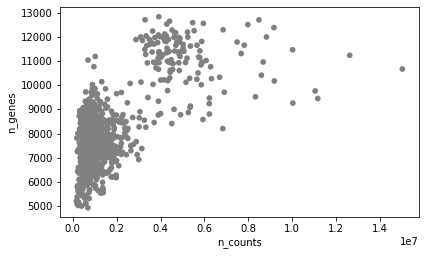

In [21]:
scanpy.pl.scatter(adata, x='n_counts', y='percent_mito')
scanpy.pl.scatter(adata, x='n_counts', y='n_genes')

In [24]:
scanpy.pp.normalize_total(adata, target_sum=2000000)

In [25]:
scanpy.pp.log1p(adata)

In [26]:
scanpy.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

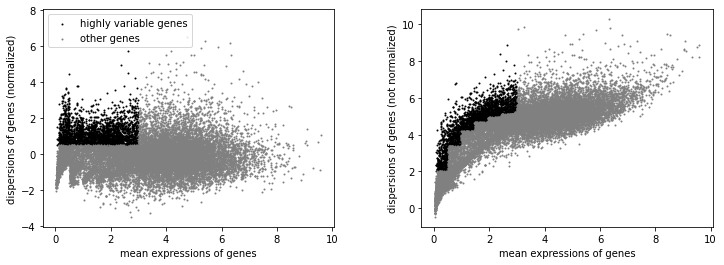

In [27]:
scanpy.pl.highly_variable_genes(adata)

In [28]:
scanpy.pp.regress_out(adata, ['n_counts', 'percent_mito'])

In [29]:
scanpy.pp.scale(adata, max_value=10)

In [30]:
scanpy.tl.pca(adata, svd_solver='arpack')

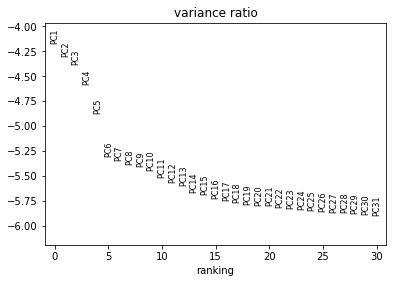

In [31]:
scanpy.pl.pca_variance_ratio(adata, log=True)

In [32]:
scanpy.pp.neighbors(adata, n_neighbors=10, n_pcs=6)

In [50]:
scanpy.tl.draw_graph(adata)

ModuleNotFoundError: No module named 'igraph'

In [33]:
scanpy.tl.umap(adata)

In [34]:
scanpy.tl.leiden(adata)

ImportError: Please install the leiden algorithm: `conda install -c conda-forge leidenalg` or `pip3 install leidenalg`.

In [48]:
[x for x in adata.var_names if 'Ctcf' in x]

['ENSMUSG00000005698.11|Ctcf']

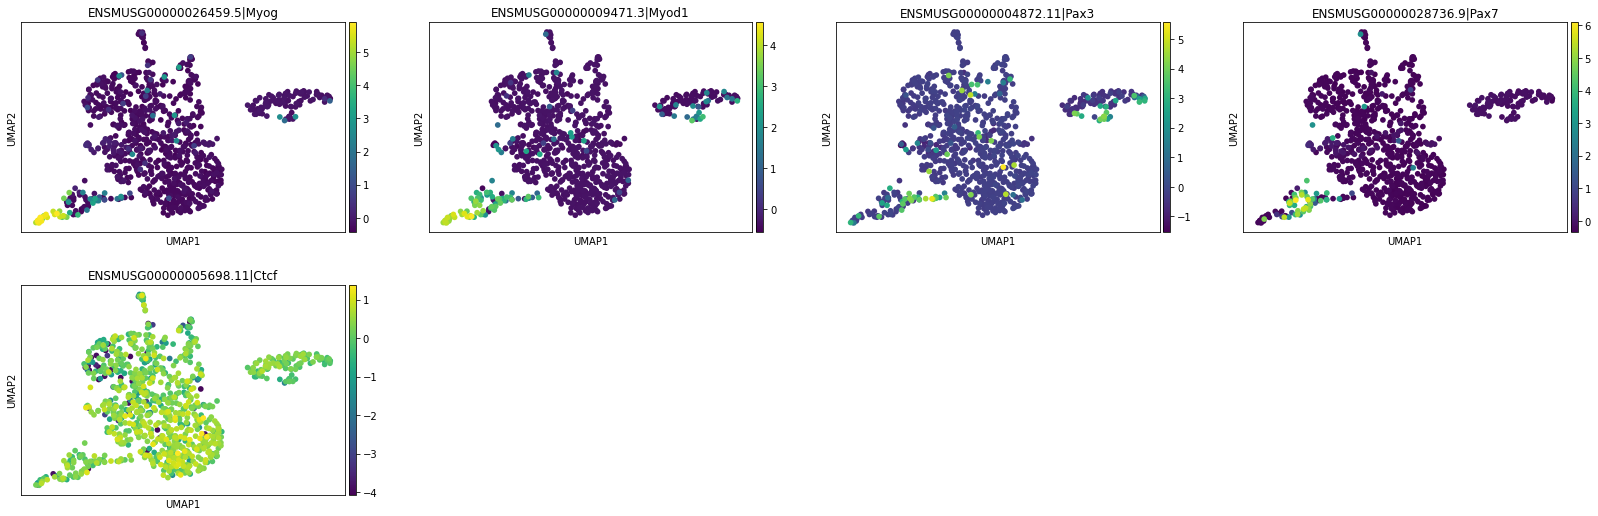

In [49]:
scanpy.pl.umap(adata, color=[
    'ENSMUSG00000026459.5|Myog',
    'ENSMUSG00000009471.3|Myod1',
    'ENSMUSG00000004872.11|Pax3',
    'ENSMUSG00000028736.9|Pax7',
    'ENSMUSG00000005698.11|Ctcf',
])